In [421]:
import requests
import time
import pandas as pd
import datetime as dt
from math import fabs, sqrt
import copy
import matplotlib.pyplot as plt
import numpy as np

from analyzer.bus_data import Bus_data as bd
from analyzer.utils.utils import filter_still

#### Funkcje pomocnicze:

In [423]:
def get_dist(xdiff, ydiff) -> float:
    dist = sqrt(fabs(xdiff)**2 + fabs(ydiff)**2)
    return dist

def close(x1, y1, x2, y2) -> bool:
    delta = get_dist(x2 - x1, y2 - y1)
    return delta < 0.001

def far(x1, y1, x2, y2) -> bool:
    delta = get_dist(x2 - x1, y2 - y1)
    return delta < 0.01 and not close(x1, y1, x2, y2)

def timedatas_close(time1, time2, tolerance) -> bool:
    for time in time1: 
        delta_time = fabs((time - time2).total_seconds())
        if delta_time <= tolerance:
            return True
    return False

def fix_date(strr):
    splitlist = strr.split(':')
    splitlist[0] = str(int(splitlist[0]) % 24)
    
    separator = ':'
    result = separator.join(splitlist)
    
    return result

err_str = 'Błędna metoda lub parametry wywołania'

#### Dane autobusow z 00:30

In [2]:
data = bd('data_0030__25_2_2024.csv')

In [407]:
realistic_speed = data.too_fast(0,80)
realistic_speed = realistic_speed[realistic_speed.apply(filter_still, axis=1)]
realistic_speed[realistic_speed['velocity'] > 1]

,VehicleNumber,Time,Longitude,Lattitude,Line,converted_lon,converted_lat,time_diff,lon_diff,lat_diff,delta_dist,velocity
1246,7711,2024-02-25 00:31:51,20.920336,52.196266,189,2326.341363,3573.356370,20,-0.002402,0.010023,0.010306,1.855141
909,9422,2024-02-25 00:32:10,20.995295,52.321980,N64,2334.676804,3581.962751,60,-0.298794,0.248921,0.388895,23.333717
1020,9951,2024-02-25 00:32:20,20.900522,52.296844,190,2324.138046,3580.241940,60,-0.815986,-0.600189,1.012946,60.776746
673,5912,2024-02-25 00:32:20,21.116813,52.233973,116,2348.189628,3575.937771,39,0.025554,-0.011823,0.028156,2.599046
733,750,2024-02-25 00:32:22,20.864601,52.360210,250,2320.143631,3584.579977,50,-0.015123,0.006230,0.016356,1.177640
...,...,...,...,...,...,...,...,...,...,...,...,...
9364,5441,2024-02-25 01:06:25,20.971487,52.272144,N63,2332.029354,3578.550978,127,-0.630393,0.380227,0.736184,20.868220
9365,5446,2024-02-25 01:06:25,20.953445,52.238313,N43,2330.023106,3576.234908,127,-0.321346,0.400696,0.513635,14.559726
9387,6244,2024-02-25 01:06:25,20.921743,52.196841,713,2326.497810,3573.395769,127,-0.167745,0.020853,0.169036,4.791582
9280,1411,2024-02-25 01:06:25,21.004101,52.229645,N21,2335.656031,3575.641497,127,0.249310,0.032649,0.251439,7.127407


In [5]:
different_lines = realistic_speed.groupby('Line')['VehicleNumber'].nunique()


#### Testowe odebranie info o rozkladzie

In [341]:
my_key = 'f7bce48b-6a00-4b56-879e-28f6cd90ec89'
resource_id = "e923fa0e-d96c-43f9-ae6e-60518c9f3238"
busstopNr = '02'
busstopId='4051'
line = 'N35'
payload = {'id' : resource_id, 'busstopId' : busstopId, 'busstopNr' : busstopNr, 'line' : line, 'apikey' : my_key}


url = "https://api.um.warszawa.pl/api/action/dbtimetable_get"

response = requests.get(url=url, params=payload)

In [342]:
response.json()

{'result': [{'values': [{'value': 'null', 'key': 'symbol_2'},
    {'value': 'null', 'key': 'symbol_1'},
    {'value': '136', 'key': 'brygada'},
    {'value': 'Ursus-Niedźwiadek', 'key': 'kierunek'},
    {'value': 'TO-URN', 'key': 'trasa'},
    {'value': '24:29:00', 'key': 'czas'}]},
  {'values': [{'value': 'null', 'key': 'symbol_2'},
    {'value': 'null', 'key': 'symbol_1'},
    {'value': '237', 'key': 'brygada'},
    {'value': 'Ursus-Niedźwiadek', 'key': 'kierunek'},
    {'value': 'TO-URN', 'key': 'trasa'},
    {'value': '25:29:00', 'key': 'czas'}]},
  {'values': [{'value': 'null', 'key': 'symbol_2'},
    {'value': 'null', 'key': 'symbol_1'},
    {'value': '138', 'key': 'brygada'},
    {'value': 'Ursus-Niedźwiadek', 'key': 'kierunek'},
    {'value': 'TO-URN', 'key': 'trasa'},
    {'value': '26:29:00', 'key': 'czas'}]},
  {'values': [{'value': 'null', 'key': 'symbol_2'},
    {'value': 'null', 'key': 'symbol_1'},
    {'value': '101', 'key': 'brygada'},
    {'value': 'Ursus-Niedźwiadek',

#### Zebranie rozkladow jazdy w slowniku

In [8]:
my_key = 'f7bce48b-6a00-4b56-879e-28f6cd90ec89'
resource_id = "b27f4c17-5c50-4a5b-89dd-236b282bc499"
busstopNr = '01'
busstopId='7009'
line=''

payload = {'apikey' : my_key}


url = "https://api.um.warszawa.pl/api/action/public_transport_routes"

response_prz = requests.get(url=url, params=payload)

In [9]:
data_routes = response_prz.json()['result']

In [10]:
lines = dict()

In [361]:
for line in different_lines.index:
    lines[line] = dict()

    if line in data_routes:
        for name in data_routes[line]:
            for bus_stop in data_routes[line][name]:
                nr_zespolu = data_routes[line][name][bus_stop]['nr_zespolu']
                
                if nr_zespolu not in lines[line]:
                    lines[line][nr_zespolu] = dict()
                    lines[line][nr_zespolu]['id'] = dict()
    
                string = '0' + data_routes[line][name][bus_stop]['typ']
                lines[line][nr_zespolu]['id'][string] = set()
    else:
        print(str(line) + " not in megadict")

401 not in megadict
402 not in megadict
817 not in megadict
E-2 not in megadict
EX not in megadict


In [363]:
lines['N35']

{'4051': {'id': {'02': set()}},
 '4045': {'id': {'02': set()}},
 '4044': {'id': {'02': set()}},
 '4043': {'id': {'02': set()}},
 '4049': {'id': {'02': set()}},
 '4048': {'id': {'02': set()}},
 '4047': {'id': {'02': set()}},
 '4046': {'id': {'02': set()}},
 '4116': {'id': {'02': set()}},
 '4121': {'id': {'02': set()}},
 '4221': {'id': {'03': set(), '04': set()}},
 '4207': {'id': {'02': set()}},
 '4211': {'id': {'02': set()}},
 '4219': {'id': {'02': set()}},
 '4343': {'id': {'02': set()}},
 '4100': {'id': {'02': set()}},
 '4218': {'id': {'02': set()}},
 '4210': {'id': {'02': set()}},
 '4209': {'id': {'02': set()}},
 '4110': {'id': {'02': set()}},
 '4099': {'id': {'02': set()}},
 '4095': {'id': {'02': set()}},
 '4123': {'id': {'02': set()}},
 '4094': {'id': {'02': set()}},
 '4125': {'id': {'02': set()}},
 '4092': {'id': {'02': set()}},
 '4093': {'id': {'02': set()}},
 '4090': {'id': {'02': set()}},
 '4091': {'id': {'02': set()}},
 '4001': {'id': {'02': set()}},
 '4003': {'id': {'02': set(

#### Zebranie informacji o polozeniu przystankow

In [171]:
url = 'https://api.um.warszawa.pl/api/action/dbstore_get'
resource_id = 'ab75c33d-3a26-4342-b36a-6e5fef0a3ac3'

payload = {'apikey' : my_key, 'id' : resource_id}

resp_coord = requests.get(url=url, params=payload)


In [99]:
for i in data_coord:
    if len(i['values']) == 8:
        if i['values'][0]['value'] not in coord_dict:
            coord_dict[i['values'][0]['value']] = dict()
    
        coord_dict[i['values'][0]['value']][i['values'][1]['value']] = dict()
        coord_dict[i['values'][0]['value']][i['values'][1]['value']]['lat'] = i['values'][4]['value']
        coord_dict[i['values'][0]['value']][i['values'][1]['value']]['lon'] = i['values'][5]['value']
    else:
        print(i['values'])

In [100]:
data_coord[0]['values']

[{'value': '1001', 'key': 'zespol'},
 {'value': '01', 'key': 'slupek'},
 {'value': 'Kijowska', 'key': 'nazwa_zespolu'},
 {'value': '2201', 'key': 'id_ulicy'},
 {'value': '52.248455', 'key': 'szer_geo'},
 {'value': '21.044827', 'key': 'dlug_geo'},
 {'value': 'al.Zieleniecka', 'key': 'kierunek'},
 {'value': '2023-10-21 00:00:00.0', 'key': 'obowiazuje_od'}]

In [103]:
lines['N35']

{'4051': {'id': {'02': set()}},
 '4045': {'id': {'02': set()}},
 '4044': {'id': {'02': set()}},
 '4043': {'id': {'02': set()}},
 '4049': {'id': {'02': set()}},
 '4048': {'id': {'02': set()}},
 '4047': {'id': {'02': set()}},
 '4046': {'id': {'02': set()}},
 '4116': {'id': {'02': set()}},
 '4121': {'id': {'02': set()}},
 '4221': {'id': {'03': set(), '04': set()}},
 '4207': {'id': {'02': set()}},
 '4211': {'id': {'02': set()}},
 '4219': {'id': {'02': set()}},
 '4343': {'id': {'02': set()}},
 '4100': {'id': {'02': set()}},
 '4218': {'id': {'02': set()}},
 '4210': {'id': {'02': set()}},
 '4209': {'id': {'02': set()}},
 '4110': {'id': {'02': set()}},
 '4099': {'id': {'02': set()}},
 '4095': {'id': {'02': set()}},
 '4123': {'id': {'02': set()}},
 '4094': {'id': {'02': set()}},
 '4125': {'id': {'02': set()}},
 '4092': {'id': {'02': set()}},
 '4093': {'id': {'02': set()}},
 '4090': {'id': {'02': set()}},
 '4091': {'id': {'02': set()}},
 '4001': {'id': {'02': set()}},
 '4003': {'id': {'02': set(

#### Funkcje pomocnicze do punktualnosci

In [232]:
def get_all_times(response_data) -> list():
    times = list()
    curr_day = '2024-02-25'
    
    data = response_data

    for entry in data:

        correct_hour = fix_date(entry['values'][-1]['value'])
        
        strtime = curr_day + " " + correct_hour

        dtime = dt.datetime.strptime(strtime, '%Y-%m-%d %H:%M:%S')
        
        if dtime.hour >= 0 and dtime.hour <= 2:
            times.append(dtime)

    return times

In [178]:
def get_response(line, busstopId, busstopNr):
    my_key = 'f7bce48b-6a00-4b56-879e-28f6cd90ec89'
    resource_id = "e923fa0e-d96c-43f9-ae6e-60518c9f3238"

    payload = {'id' : resource_id, 'busstopId' : busstopId, 'busstopNr' : busstopNr, 'line' : line, 'apikey' : my_key}
    
    url = "https://api.um.warszawa.pl/api/action/dbtimetable_get"
    
    response = requests.get(url=url, params=payload)

    return response.json()['result']

In [320]:
3 not in lines['N35']['4051']['id']['02']

True

#### Analiza punktualnosci

In [425]:
def line_analyze(line):
    stops = copy.deepcopy(lines[line])

    line_coords_data = realistic_speed[realistic_speed['Line'] == line]

    on_time = 0
    delay = 0
    already_visited = 0
    
    for stop_id in stops:
        #print("  Analyzing stop " + str(stop_id))
        for pole_id in stops[stop_id]['id']:
            

            if pole_id in coord_dict[stop_id]:
                #print("  Analyzing pole " + str(pole_id))
                pole_coords = coord_dict[stop_id][pole_id]
                pole_lat = float(pole_coords['lat'])
                pole_lon = float(pole_coords['lon'])
                
                response = get_response(line, stop_id, pole_id)
    
                if response == err_str:
                    print("Error in stop_id retrieval for " + str(stop_id) + " " + str(pole_id) + " , retrying once more")
                    time.sleep(30)
                    response = get_response(line, busstopId, busstopNr)
    
                if response != err_str:
                    all_times = get_all_times(response)
                    for index, row in  line_coords_data.iterrows():
                        bus_lat = row['Lattitude']
                        bus_lon = row['Longitude']
                        if close(pole_lat, pole_lon, bus_lat, bus_lon):
                            if timedatas_close(all_times, row['Time'], 70):
                                if row['VehicleNumber'] not in stops[stop_id]['id'][pole_id]:
                                    stops[stop_id]['id'][pole_id].add(row['VehicleNumber'])
                                    on_time += 1
                                
                            else:
                                if row['VehicleNumber'] not in stops[stop_id]['id'][pole_id]:
                                    stops[stop_id]['id'][pole_id].add(row['VehicleNumber'])
                                    delay += 1
                                        

                    time.sleep(0.5)
                else:
                    print("No response this time :( ")
                    
            
                # print("  No pole " + str(pole_id) + " in dict of coordinates")

    return [on_time, delay, already_visited]

In [427]:
print(n35_analysis)

[6, 12, 0]


In [426]:
n35_analysis = line_analyze('N35')

In [430]:
n32_analysis = line_analyze('N32')

In [431]:
n32_analysis

[3, 10, 0]

In [438]:
n64_analysis = line_analyze('N64')

In [432]:
n43_analysis = line_analyze('N43')

In [433]:
n43_analysis

[7, 10, 0]

#### Wykresy

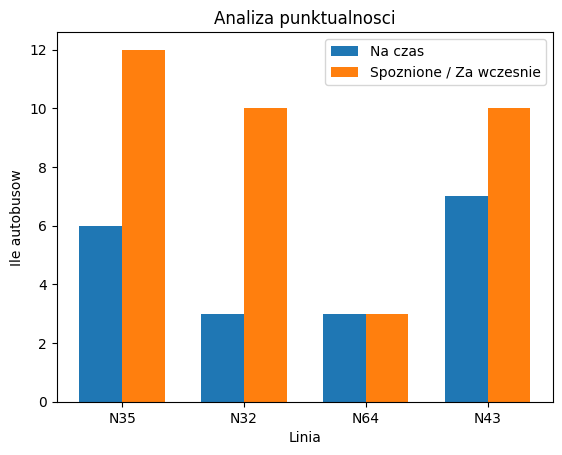

In [439]:
categories = ['N35', 'N32', 'N64', 'N43']
values1 = [n35_analysis[0], n32_analysis[0], n64_analysis[0], n43_analysis[0]]
values2 = [n35_analysis[1], n32_analysis[1], n64_analysis[1], n43_analysis[1]]


bar_width = 0.35

x = np.arange(len(categories))

# Plot bars
plt.bar(x - bar_width/2, values1, width=bar_width, label='Na czas')
plt.bar(x + bar_width/2, values2, width=bar_width, label='Spoznione / Za wczesnie')

# Add labels, title, and legend
plt.xlabel('Linia')
plt.ylabel('Ile autobusow')
plt.title('Analiza punktualnosci')
plt.xticks(x, categories)
plt.legend()

# Show plot
plt.show()